# Introduction to Probabilisitic Methods

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Question**: What is the expected value of the roll of a fair dice with $6$ sides?

### Mathematical Solution

Let $X$ be the random variable of rolling a single dice. The probability distribution has a uniform value of $1/6$ of any possible outcome. Therefore the expected value is

$$E[X]=\frac{1}{6}*1 + \frac{1}{6}*2 + \frac{1}{6}*3 + \frac{1}{6}*4 + \frac{1}{6}*5 + \frac{1}{6}*6 = 3.5.$$

### Probabilistic Solution

Approaching our objective from a probabilistic point of view, we simulate the outcomes of playing the game many times and see what happens on average.

In [1]:
#import numpy and pyplot

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Run dice throwing simulation with 100 rolls of the dice.
N = 100

game_outcomes = np.random.randint(low =1, high =7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)# Find mean of simulated dice

print(f'The mean value of {N} simulations of dice roll is {average_outcome}.')

The mean value of 100 simulations of dice roll is 3.58.


In [3]:
#Run a second simulation with 100 rolls of the dice.
N = 100

game_outcomes = np.random.randint(low =1, high =7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)# Find mean of simulated dice

print(f'The mean value of {N} simulations of dice roll is {average_outcome}.')

The mean value of 100 simulations of dice roll is 3.36.


### Observation

The average values of the two simulation of rolling a dice 100 will likely have significant difference.

Increasing the number of simulations will naturally decrease the variance in simulated outcomes.

In [4]:
#Run simulation with 10,000 trials.
N = 10000

game_outcomes = np.random.randint(low =1, high =7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)# Find mean of simulated dice

print(f'The mean value of {N} simulations of dice roll is {average_outcome}.')

The mean value of 10000 simulations of dice roll is 3.5008.


In [5]:
#Run a second simulation with 10,000 trials
N = 10000

game_outcomes = np.random.randint(low =1, high =7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)# Find mean of simulated dice

print(f'The mean value of {N} simulations of dice roll is {average_outcome}.')

The mean value of 10000 simulations of dice roll is 3.4856.


**The Central Limit Theorem** Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with mean $\mu$ and finite variance $\sigma^2$. As $n$ becomes large, the distribution of the sample mean $\bar{X}$ approaches a **normal distribution** with mean $\mu$ and variance $\frac{\sigma^2}{n}$.


The central limit theorem informs of two pieces of important information:

1) As we increase the number of simulations we are more likely provided with a more reliable estimate.
2) We can measure how likely an estimate differs from the true expected value within a given distance.

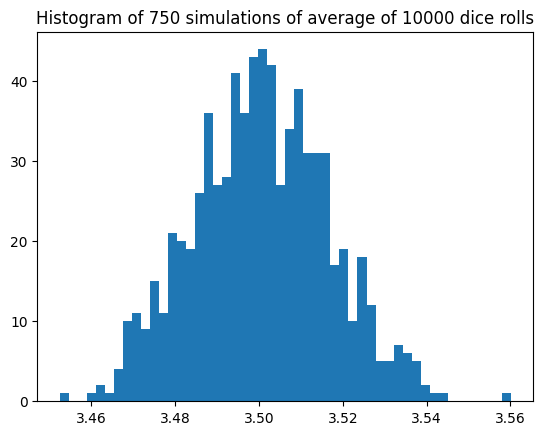

In [7]:
#Repeat the above simulation a large number of times.

N = 750 #750 total simulations 
M =  10000# 10,000 dice rolls per simulation

game_outcomes = [np.random.randint(low = 1, high =7, size =M) for i in range(N)] # Create an array of random integers simulating dice rolls

average_outcomes = [np.mean(x) for x in game_outcomes] # Create an array of the average outcomes

#Plot histogram of simulated means
plt.hist(average_outcomes, bins = 50)
plt.title(f'Histogram of {N} simulations of average of {M} dice rolls')
plt.show()

In [8]:
 #Find sample mean and standard deviation
mu = np.mean(average_outcomes)
sigma = np.std(average_outcomes)

print(f'Mean is {mu} standard deviation is {sigma}.')

Mean is 3.5005574666666663 standard deviation is 0.016068443325834503.


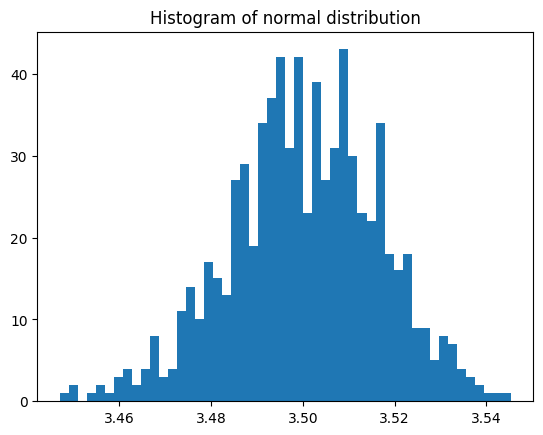

In [9]:
# Create histogram of random draws from normal distribution
# with mean and standard deviation that matches the sample

normal_values = [np.random.normal(loc = mu, scale = sigma) for i in range(N)]

plt.hist(normal_values, bins = 50)
plt.title(f'Histogram of normal distribution')
plt.show()

# **The 68-95-99.7 Rule**

If $\sigma$ is the sample standard deviation of an experiment with simulated value $E$ with true mean $\mu$, then there is approximately a $68\%$ chance that $|E-\mu|\leq \sigma$, approximately a $95\%$ that $|E-\mu|\leq 2\sigma$, and a $99.7\%$ chance that $|E-\mu|\leq 3\sigma$.

In [10]:
#Print what we expect by the 68-95-99.7 rule

print(f'We expect 68% of the experiments to be within {sigma} of the true mean of 3.5')
print('--------------')
print(f'We expect 95% of the experiments to be within {2*sigma} of the true mean of 3.5')
print('--------------')
print(f'We expect 99.7% of the experiments to be within {3*sigma} of the true mean of 3.5')
print('--------------')

We expect 68% of the experiments to be within 0.016068443325834503 of the true mean of 3.5
--------------
We expect 95% of the experiments to be within 0.03213688665166901 of the true mean of 3.5
--------------
We expect 99.7% of the experiments to be within 0.048205329977503514 of the true mean of 3.5
--------------


In [15]:
#Sort experiments if sample mean is within 1,2, and 3 standard deviations of the true mean of 3.5
average_outcomes_one_std = [x for x in average_outcomes if np.abs(x - 3.5) <= sigma]
average_outcomes_two_std = [x for x in average_outcomes if np.abs(x-3.5)<=2*sigma]
average_outcomes_three_std = [x for x in average_outcomes if np.abs(x-3.5)<=3*sigma]


#Find if the percentage of average outcomes matches expectations.
percent_one_std = len(average_outcomes_one_std)/N
percent_two_std = len(average_outcomes_two_std)/N
percent_three_std = len(average_outcomes_three_std)/N

#Print the percentage of experiments within 1,2, and 3 standard deviations.
print(f'Outcomes within one standard deviation is {100*percent_one_std}%')
print(f'Outcomes within two standard deviation is {100*percent_two_std}%')
print(f'Outcomes within three standard deviation is {100*percent_three_std}%')

Outcomes within one standard deviation is 68.53333333333333%
Outcomes within two standard deviation is 95.46666666666667%
Outcomes within three standard deviation is 99.86666666666667%


## Probabilistic Concepts in Dice Roll Simulation

- The **sample space** of the simple dice game is the possible outcomes of playing the game, i.e. rolling a 1, 2, 3, 4, 5 or 6.

<br>

- The **probability distribution** of the simple dice game is an assignment of a probability to each outcome. The dice is fair, so each outcome has a probability of $1/6$.

<br>

- **Simulation** is used to estimate the expected value. Simulation techniques are the core of finding value to financial instruments and investment strategies.

<br>

- As we increse the number of simulations of the simple dice game, the average values seem to stabilize around a common value, namely the expected value. This phenomena is precisely the content of the **The Theorem of Large Numbers**.

<br>

- As we increase the number of simulations, the variance between simulated expected values and the true expected value decreases. This process aligns with the **Central Limit Theorem**, which states that the sample mean of a sufficiently large number of independent and identically distributed random variables will follow a normal distribution. This theorem is fundamental to quantitative finance, enabling us to apply **probabilisitic methodology** to value portfolios, determine fair stock option pricing, and perform risk assessment with confidence. We can then use **statistical methodology** to measure the confidence of our simulated measurements.

## More Monte-Carlo Simulations


**Estimating $\sqrt{2}$**

Consider the line segment joining the point $(0,0)$ and $(1,1)$. This line segment is of length $\sqrt{2}$ and the subline segment joining $(0,0)$ to $\left(\frac{\sqrt{2}}{{2}}, \frac{\sqrt{2}}{{2}}\right)$ has length $1$. Therefore the probability of randomly selectly a point on this line within the subline segment is $\frac{1}{\sqrt{2}} = \frac{\sqrt{2}}{2}$. Every point on the line segment is of the form $(x,x)$ with $0\leq x\leq 1$ and such a point lies within the subline segment of length $1$ if and only if $2x^2 \leq 1$. We therefore can estimate $\sqrt{2}$ by selecting $x$ from the unit interval $[0,1]$ with uniform distribution and measure the ratio of $x$-values with the property that $2x^2\leq 1$. Multiplying the result by $2$ yields an estimate for $\sqrt{2}$.  

In [18]:
#Run 10,000 experiments to simulate the value of \sqrt{2}
N = 10000

X = [np.random.uniform(0,1) for i in range(N)]  # select N random values in the unit interval

Y = [x for x in X if 2*x**2<= 1] # store random values that satisfy 2x^2<= 1

sqrt_2_estimate = 2*len(Y)/len(X) #Estimate sqrt 2 from the simulation

#Print the simulated value of \sqrt{2}.
print(f'Estimated value of sqrt(2) is {sqrt_2_estimate}.')

Estimated value of sqrt(2) is 1.4108.


In [17]:
#Compare simulated value with the actual value of \sqrt{2} given by numpy.
np.sqrt(2)

np.float64(1.4142135623730951)

**Question**: Consider the uniform distribution on the unit interval $[0,1]$. 

What is the expected number of draws needed for the sum to exceed $1$?

In [20]:
#Define a function that performs a simulation of drawing numbers at random from
#the uniform distribution until the sum exceeds 1 and returns average number of draws needed


def exceed_one():
    s  = 0# s will be the sum of random draws from unit interval
    n  = 0# n is the number of draws needed until the sum exceeds 1
    while s<=1:
        n+=1
        s+= np.random.uniform(0,1)
    return n


#Perform 10,000 simulations
N = 10000 #Number of simulations
X = [exceed_one() for i in range(N)] # store number of draws needed over N simulations

#Print average number of draws needed.
print(f'Average number of draws needed is {np.mean(X)}.')

Average number of draws needed is 2.714.


## Mathematical Solution

With the right trick, it is not difficult to prove that the true expected value is Euler's constant $e$.

**Sketch of Proof**

Given a real number $x\geq 0$ let $f(x)$ be the expected number of draws from the unit interval so that the sum exceeds $x$. 

Given $x\in \mathbb{R}$, to compute the the probability $f(x)$ we consider the conditional relation that the expected number of random draws needed for the sum to exceed $x$ is $1$ more than average number of expected draws needed over the interval $(x-1,x]$. This is expressed as an equation

$$
f(x)= 1 + \int_{x-1}^{x} f(z)\,dz.
$$

If $z<0$ then $f(z)=0$. We therefore restrict our attention to $x$-values which lie in the unit interval $[0,1]$ so that

$$
f(x)= 1 + \int_{x-1}^{x} f(z)\,dz = 1 + \int_{0}^{x} f(z)\,dz.
$$

Taking derivatives of the furtherest-left and furtherest-right expressions in the equation, and applying the Fundamental Theorem of Calculus;

$$
f'(x) = f(x).
$$

We have an initial condition that $f(0)=1$. Therefore the solution function for $0\leq x\leq 1$ is $f(x)=e^x$. In particular, $f(1)=e$ is the expected number of draws needed from the unit interval with uniform distribution for the sum of the random variables to exceed $1$.